In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\rasha\OneDrive\Desktop\Job 2026\Finance data\bank-full.csv", sep = ';')

In [4]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

age — Customer’s age in years
job — Customer’s occupation (admin, technician, student, etc.)
marital — Marital status (married, single, divorced)
education — Customer’s education level
default — Whether the customer has credit default history (yes/no)
balance — Average yearly bank balance (in account)
housing — Whether customer has a housing loan (yes/no)
loan — Whether customer has a personal loan (yes/no)
contact — Contact communication type used (cellular, telephone, unknown)
day — Last contact day of the month
month — Last contact month
duration — Duration of last contact call in seconds
campaign — Number of contacts performed during this campaign for the customer
pdays — Number of days since customer was last contacted from previous campaign (-1 means never contacted)
previous — Number of contacts before this campaign
poutcome — Outcome of previous campaign (success, failure, unknown)
y — Target variable: whether customer subscribed to term deposit (yes/no)

1️⃣ Target variable analysis

<Axes: xlabel='y', ylabel='count'>

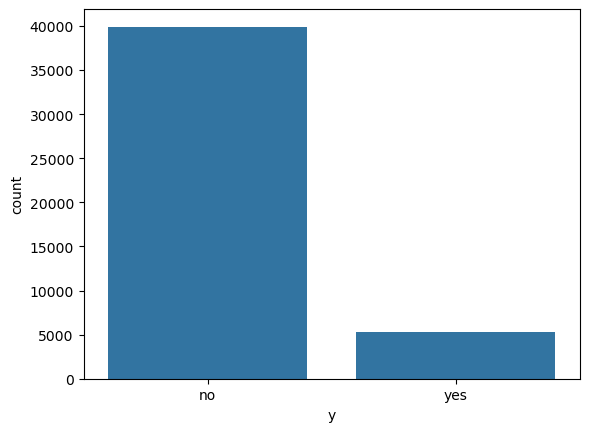

In [6]:
# 1. What is the distribution of the target variable y?

sns.countplot(x = df['y'])

In [7]:
# Is the dataset imbalanced? -- > yes ~ 40 k who did not take term deposit , out of 45k

In [8]:
# What is the conversion rate (%)?
conversion_rate  = np.round(len(df[df['y'] == 'no'])* 100 / len(df), 2)
conversion_rate

88.3

2️⃣ Numerical variable analysis

In [9]:
# What is the average age?

average_age = (df['age']).mean()
average_age

40.93621021432837

<Axes: xlabel='age', ylabel='Count'>

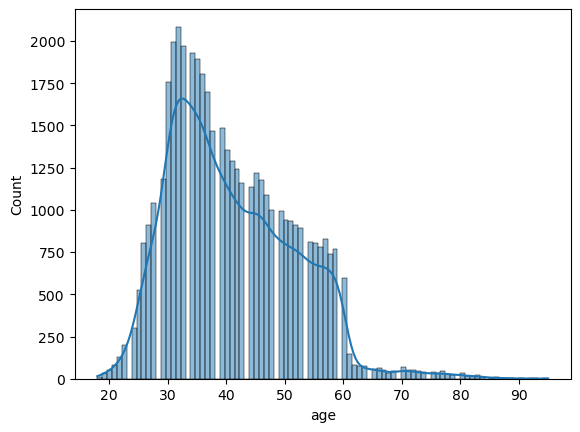

In [10]:
# What is the age distribution?
sns.histplot(df['age'], kde = True)

In [11]:
# most of the ages fall between 30 to 45, with lots of outliers as confirmed by boxplot, data is also right skewed

<Axes: ylabel='age'>

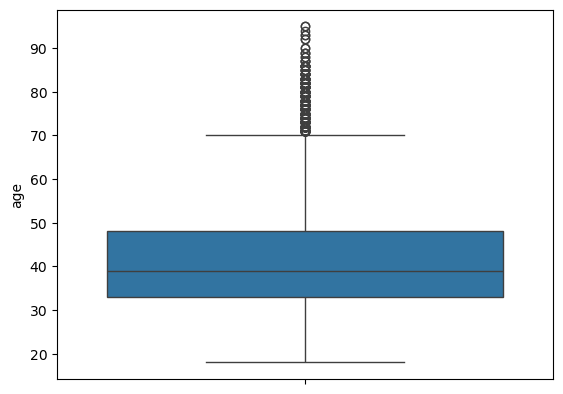

In [12]:
sns.boxplot(df['age'])

In [13]:
# Which age group subscribes more?

df.groupby('y')['age'].mean()

y
no     40.838986
yes    41.670070
Name: age, dtype: float64

In [14]:
# Are older people more likely to subscribe?

old = df[df['age']> 60]

young = df[df['age'] < 60]

In [15]:
old_ratio = len(old[old['y'] =='yes']) / len(old)
young_ratio = len(young[young['y'] =='yes']) / len(young)

print('old_buying_ratio', old_ratio)
print('Young_buying_ratio', young_ratio)

old_buying_ratio 0.4225589225589226
Young_buying_ratio 0.10797430170170631


In [16]:
# Old people are more likely to buy the term deposit

In [17]:
# What is the average balance?

df['balance'].mean()

1362.2720576850766

In [18]:
# Do customers with higher balance subscribe more?

df.groupby('y')['balance'].mean()  # customers with high balance tend to subscribe more

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

<Axes: xlabel='balance', ylabel='y'>

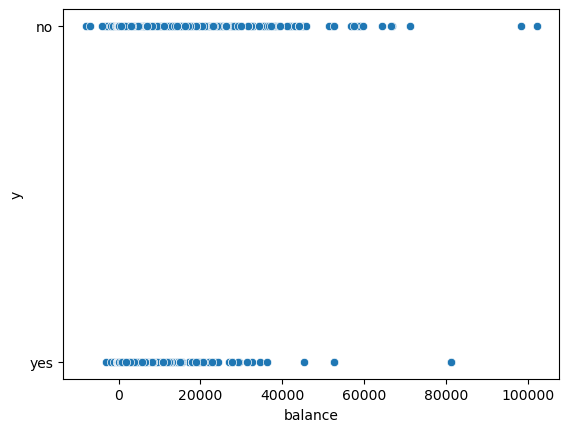

In [19]:
# Are there outliers?
sns.scatterplot(y = df['y'], x = df['balance'])

<Axes: xlabel='balance', ylabel='y'>

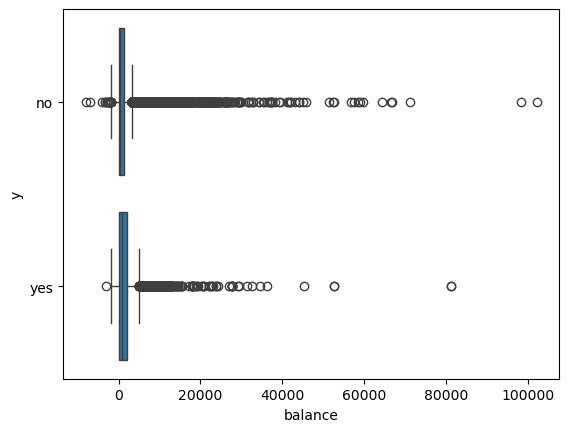

In [20]:
sns.boxplot(y = df['y'], x = df['balance'])

In [21]:
# there are large number of outliers, counter intuitively, people who have low balance, they are also buying the term deposit plan, and vice versa

In [22]:
# Do longer calls increase subscription probability?

df.groupby('y')['duration'].mean()  # longer calls generally convert on average, Customers with higher duration subscribe more.

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

In [23]:
# How many contacts were made per customer?

df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Warm vs Cold customers

In [24]:
# How many customers were previously contacted?

print(len(df[df['pdays'] != -1])) # 8257 people were previously conatcted in some or th other campaigns

8257


In [25]:
#  Does previous contact improve success rate?

df.groupby(['pdays', 'y']).size().unstack()  # people conatcted 1 or 2 days before in previous campaign have higher conversion rate

# 7 percent clients subscribed to the term deposit who were never conatcted before
# Most customers were contacted for the first time, and their subscription rate is relatively low.
# "Customers contacted recently (lower pdays) show relatively higher subscription rates in some cases, 
# suggesting recency of contact may influence conversion, although sample sizes are small."
# strong class imbalance in target - 'y'


y,no,yes
pdays,,
-1,33570.0,3384.0
1,9.0,6.0
2,35.0,2.0
3,1.0,NaN
4,1.0,1.0
...,...,...
838,1.0,NaN
842,NaN,1.0
850,1.0,NaN


In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [27]:
# Does number of previous contacts affect subscription?

result = df.groupby(['previous', 'y']).size().unstack().reset_index()
result['ratio'] = np.round((result['yes'] / (result['yes'] + result['no']))* 100, 2)
result

y,previous,no,yes,ratio
0,0,33570.0,3384.0,9.16
1,1,2189.0,583.0,21.03
2,2,1650.0,456.0,21.65
3,3,848.0,294.0,25.74
4,4,543.0,171.0,23.95
5,5,338.0,121.0,26.36
6,6,194.0,83.0,29.96
7,7,151.0,54.0,26.34
8,8,90.0,39.0,30.23
9,9,68.0,24.0,26.09


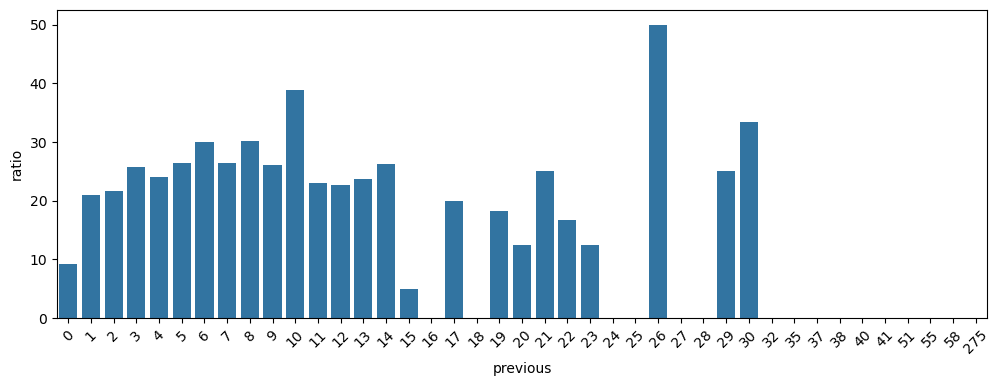

In [28]:
plt.figure( figsize= (12,4))
sns.barplot(x = result['previous'], y = result['ratio'])
plt.xticks(rotation = 45)
plt.show()

In [29]:
# Conversion rate increases with number of previous contacts initially, but plateaus after a certain point. 
# This suggests diminishing returns, where customers who have not converted after multiple contacts are less likely to subscribe,
#  indicating resistant or low-probability customers.

# Although conversion rate appears high at certain higher contact counts such as 26, 
        # This is not statistically significant due to extremely small sample size at 26 calls ( 1 yes, 1 no)

# The bank should limit the number of repeated contacts, as excessive contacts do not significantly improve conversion and may waste marketing resources.

# CATEGORICAL COLUMN ANALYSIS

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [31]:
# Which job category subscribes most?
result = df.groupby(['job', 'y']).size().unstack()
result['ratio'] = result['yes'] / (result['yes'] + result['no'] )
result.sort_values(by = 'ratio', ascending = False)

# Students and retired customers show higher subscription rates compared to other job categories. 
# This may indicate that these groups prefer low-risk, fixed-return investment products such as term deposits.

'''Possible data-consistent explanations:

Lower income → prefer safe fixed returns

Less exposure to stock markets

Smaller savings → term deposit feels secure

Banks may target students with attractive offers'''

# Blue-collar workers show the lowest subscription rate, which may be influenced by income constraints or different financial priorities.

'Possible data-consistent explanations:\n\nLower income → prefer safe fixed returns\n\nLess exposure to stock markets\n\nSmaller savings → term deposit feels secure\n\nBanks may target students with attractive offers'

In [32]:
# Do single people subscribe more?

result = df.groupby(['marital', 'y']).size().unstack()
result['ratio'] = result['yes'] / (result['yes'] + result['no'] )
result.sort_values(by = 'ratio', ascending = False)

y,no,yes,ratio
marital,,,
single,10878,1912,0.149492
divorced,4585,622,0.119455
married,24459,2755,0.101235


In [33]:
# Single people tend to subscribe more sue to low risk investment nature

In [34]:
# Does education level affect subscription?

result = df.groupby(['education', 'y']).size().unstack()
result['ratio'] = result['yes'] / (result['yes'] + result['no'] )
result.sort_values(by = 'ratio', ascending = False)

y,no,yes,ratio
education,,,
tertiary,11305,1996,0.150064
unknown,1605,252,0.135703
secondary,20752,2450,0.105594
primary,6260,591,0.086265


In [35]:
# Higher educated people tend to make safer investments

In [36]:
# Do customers with credit default subscribe less?

result = df.groupby(['default', 'y']).size().unstack()
result['ratio'] = result['yes'] / (result['yes'] + result['no'] )
result.sort_values(by = 'ratio', ascending = False)

# customers with credit default tend to subscribe less due to financial constraints

y,no,yes,ratio
default,,,
no,39159,5237,0.117961
yes,763,52,0.063804


In [37]:
# Do customers with housing loan subscribe less?
result = df.groupby(['housing', 'y']).size().unstack()
result['ratio'] = result['yes'] / (result['yes'] + result['no'] )
result.sort_values(by = 'ratio', ascending = False)

# people with no housing loan tend to subscribe more due to more readily available funds

y,no,yes,ratio
housing,,,
no,16727,3354,0.167024
yes,23195,1935,0.077000


In [38]:
#  Do customers with personal loan subscribe less? -- yes

result = df.groupby(['loan', 'y']).size().unstack()
result['ratio'] = result['yes'] / (result['yes'] + result['no'] )
result.sort_values(by = 'ratio', ascending = False)

y,no,yes,ratio
loan,,,
no,33162,4805,0.126557
yes,6760,484,0.066814


In [39]:
# Which contact method works best?

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [44]:
result = df.groupby(['contact', 'y']).size().unstack().reset_index()

In [45]:
result['ratio']  = result['yes'] / (result['yes'] + result['no'])
result

y,contact,no,yes,ratio
0,cellular,24916,4369,0.149189
1,telephone,2516,390,0.134205
2,unknown,12490,530,0.040707


In [ ]:
# Cellular conatct method is best for conversions as people are more available on cellular number as compared to telephone or other sources
# Many people might not even have a telephone separately 

In [49]:
# Which month has highest subscription rate? -- March, closely followed by December, September and October
result = df.groupby(['month', 'y']).size().unstack().reset_index()
result['ratio']  = result['yes'] / (result['yes'] + result['no'])
result.sort_values(by = 'ratio', ascending = False)

y,month,no,yes,ratio
7,mar,229,248,0.519916
2,dec,114,100,0.467290
11,sep,310,269,0.464594
10,oct,415,323,0.437669
0,apr,2355,577,0.196794
3,feb,2208,441,0.166478
1,aug,5559,688,0.110133
6,jun,4795,546,0.102228
9,nov,3567,403,0.101511
4,jan,1261,142,0.101212


In [ ]:
# Does previous success increase current success probability?  - yes it does, previous success → very high conversion rate

In [55]:
result = df.groupby(['poutcome', 'y']).size().unstack().reset_index()
result['ratio']  = result['yes'] / (result['yes'] + result['no'])
result.sort_values(by = 'ratio', ascending = False)

y,poutcome,no,yes,ratio
2,success,533,978,0.647253
1,other,1533,307,0.166848
0,failure,4283,618,0.126097
3,unknown,33573,3386,0.091615


In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='age', ylabel='ratio'>

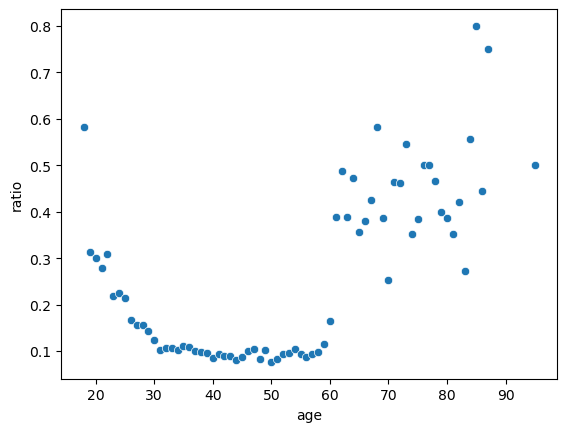

In [63]:
# How does age affect subscription?
result = df.groupby(['age', 'y']).size().unstack().reset_index()
result['ratio']  = result['yes'] / (result['yes'] + result['no'])
sns.scatterplot(x = result['age'], y = result['ratio'])


In [ ]:
# young people below 30 years and aged people above 60 years show more conversio as compared to middle aged people

In [66]:
# Does balance affect subscription?  # on average people woh have more balance show higher conversion
result = df.groupby('y')['balance'].mean().reset_index()

<BarContainer object of 2 artists>

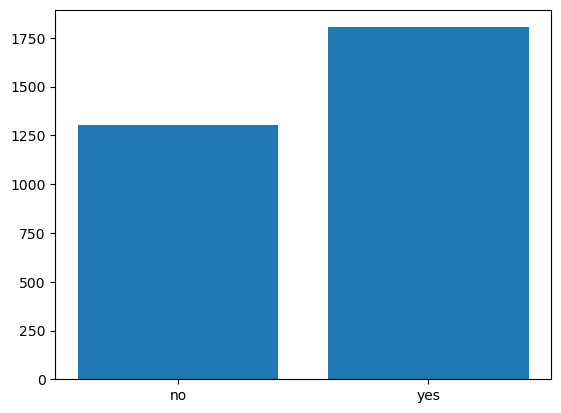

In [67]:
plt.bar(result['y'], result['balance'])

In [68]:
# Does duration affect subscription?
df['duration']

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64

In [69]:
df['y_numeric'] = df['y'].map({'no': 0, 'yes': 1})

C:\Users\rasha\AppData\Local\Temp\ipykernel_18480\260845245.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


{'whiskers': [<matplotlib.lines.Line2D at 0x21c712f9de0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c712fa3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c712f9ae0>,
 'medians': [<matplotlib.lines.Line2D at 0x21c712fa9e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21c712face0>,
 'means': []}

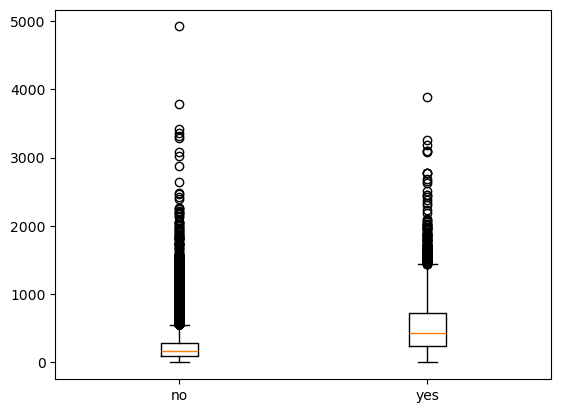

In [74]:
plt.boxplot(
    [df[df['y']=='no']['duration'],
     df[df['y']=='yes']['duration']],
    labels=['no','yes']
)

# median duration for 'yes' is more than 'no', duration of call does affect subscription rate,
Median comparison

Approximate medians:

no: ~150 seconds

yes: ~400 seconds

Customers who subscribed had much longer call durations.
# whiskers - normal range for 'yes' is also much wider than 'no'

# Customers with longer call durations are significantly more likely to subscribe. 
# This suggests that engagement level during the call is a strong indicator of conversion probability.

In [78]:
# Does campaign affect subscription?

result = df.groupby(['campaign', 'y']).size().unstack().reset_index()
result['ratio']  = result['yes'] / (result['yes'] + result['no'])
result.sort_values(by = 'ratio', ascending = False)

# certain campaigns have more connversion ratio

y,campaign,no,yes,ratio
0,1,14983.0,2561.0,0.145976
1,2,11104.0,1401.0,0.112035
2,3,4903.0,618.0,0.111936
31,32,8.0,1.0,0.111111
3,4,3205.0,317.0,0.090006
16,17,63.0,6.0,0.086957
10,11,185.0,16.0,0.079602
4,5,1625.0,139.0,0.078798
5,6,1199.0,92.0,0.071263
8,9,306.0,21.0,0.064220


#  Multivariate analysis (ADVANCED EDA)